# GenericFormulaFinder (GFF)
___
#### Ce papier donne au lecteur un outil pour facilement trouver l'approximation d'un polynome correspondant à une suite (si celle-ci s'assimile à un polynome).

Ces résultats pourront ensuite être prouvés par hypothèse de récurrence.

In [947]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import pandas as pd

## Paramètres de calcul de la suite :

**nbr_points : ** Le nombre de points de la suite à **afficher** à l'écran (_sert à mieux visualiser les résultats_)

**offset : ** Le rang à partir duquel commencer à calculer les termes de la suite

**n : ** Le nombre de points de la suite à **calculer**. Un n assez petit (10 ou moins) est recommandé car il permet de créer "à la main" y.

In [980]:
nbr_points = 30  # Pas exact comme valeur
offset = 0
n = 5 
degre_max = 4

In [981]:
def approx_zeros(li):
    for i in range(0, len(li) + 1):
        if(li[i] < 1e-9):  # Valeur seuil
            p[i] = 0

## Expression de la suite :

Modifiez la liste **y** ci-dessous pour qu'elle corresponde aux premières valeurs de votre suite

_n et offset ont déjà étés définis_

Faîtes bien attention à faire correspondre x et y

In [982]:
y = np.array([i*(i+1)/2 for i in range(offset, n + offset, ecart)])
y = [0, 2, 8, 20, 40]

In [983]:
ecart = int((n-offset)/(nbr_points-1) + 1)
x = np.array([int(i) for i in range(offset, n + offset, ecart)])

df = pd.DataFrame({"un(n)":y, "n":x,})

## Tableau de valeurs
Valeurs de n et de Un pour pouvoir vérifier

In [984]:
df

,n,un(n)
0,0,0
1,1,2
2,2,8
3,3,20
4,4,40


## Détermination du degré du polynome, de ses coefficients et de ses racines

Le coefficient est de la forme : **[an, a(n-1), ..., a1 ,a0]** pour une fonction du type : **f(x) = an*x^n + a(n-1)*x^(n-1) + ... + a1*x + a0**

Ex:
[0.5 0.5 0] <=> 0.5*x^2 + 0.5*x

In [994]:
p = np.poly1d(np.polyfit(x, y, degre_max))
approx_zeros(p)
degre = degre_max
i = 0

while(p.c[0] == 0):
    degre = degre - 1
    p = np.poly1d(np.polyfit(x, y, degre))
    approx_zeros(p)

print("Degré :" ,len(p.c))
print("Coefficients :", list(p.c))
print("Racines : ", p.r)

Degré : 4
Coefficients : [0.33333333333333337, 0.99999999999999967, 0.66666666666666485, 0.0]
Racines :  [-2. -1.  0.]


___
# Visualisation du résultat

Nous voyons ici nos deux courbes.


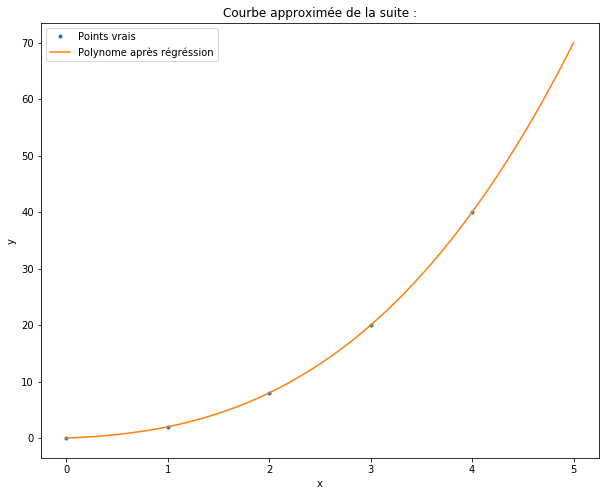

In [996]:
plt.figure(figsize=(10, 8))
xp = np.linspace(offset, n+offset, 100)
_ = plt.plot(x, y, '.', label = 'Points vrais')
_ = plt.plot(xp, p(xp), '-', label = 'Polynome après régréssion')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Courbe approximée de la suite :')


plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()